<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.695092,28.716155,66.383743,23.541611,0.001996,213.338596,213.337112,0.001484
1,0.0,1.0,20.350393,62.287294,70.259982,50.444529,-0.000313,213.341885,213.342235,-0.000350
2,0.0,2.0,76.561302,96.805859,31.405448,40.736084,0.000067,255.508761,255.508654,0.000107
3,0.0,3.0,80.975921,26.254396,24.288490,87.749086,0.003292,229.271185,229.268799,0.002386
4,0.0,4.0,75.009547,70.290963,31.476107,47.655563,-0.000139,234.432042,234.432459,-0.000417
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,97.916028,74.491757,43.644272,48.826583,0.000072,274.878713,274.878414,0.000298
59996,999.0,56.0,92.067119,43.263773,99.039652,58.425781,0.000214,302.796539,302.796292,0.000247
59997,999.0,57.0,77.768621,48.200863,24.518839,64.217026,-0.000488,224.704860,224.704869,-0.000009
59998,999.0,58.0,90.921984,76.489208,88.502879,68.585615,-0.000103,334.499583,334.499743,-0.000160


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.695092,28.716155,66.383743,23.541611,0.001996,213.338596,213.337112,0.001484
1,0.0,1.0,20.350393,62.287294,70.259982,50.444529,-0.000313,213.341885,213.342235,-0.000350
2,0.0,2.0,76.561302,96.805859,31.405448,40.736084,0.000067,255.508761,255.508654,0.000107
3,0.0,3.0,80.975921,26.254396,24.288490,87.749086,0.003292,229.271185,229.268799,0.002386
4,0.0,4.0,75.009547,70.290963,31.476107,47.655563,-0.000139,234.432042,234.432459,-0.000417
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,97.916028,74.491757,43.644272,48.826583,0.000072,274.878713,274.878414,0.000298
59996,999.0,56.0,92.067119,43.263773,99.039652,58.425781,0.000214,302.796539,302.796292,0.000247
59997,999.0,57.0,77.768621,48.200863,24.518839,64.217026,-0.000488,224.704860,224.704869,-0.000009
59998,999.0,58.0,90.921984,76.489208,88.502879,68.585615,-0.000103,334.499583,334.499743,-0.000160


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.695092,28.716155,66.383743,23.541611,0.001996,213.338596,213.337112,0.001484
1,0.0,1.0,20.350393,62.287294,70.259982,50.444529,-0.000313,213.341885,213.342235,-0.000350
2,0.0,2.0,76.561302,96.805859,31.405448,40.736084,0.000067,255.508761,255.508654,0.000107
3,0.0,3.0,80.975921,26.254396,24.288490,87.749086,0.003292,229.271185,229.268799,0.002386
4,0.0,4.0,75.009547,70.290963,31.476107,47.655563,-0.000139,234.432042,234.432459,-0.000417
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,97.916028,74.491757,43.644272,48.826583,0.000072,274.878713,274.878414,0.000298
59996,999.0,56.0,92.067119,43.263773,99.039652,58.425781,0.000214,302.796539,302.796292,0.000247
59997,999.0,57.0,77.768621,48.200863,24.518839,64.217026,-0.000488,224.704860,224.704869,-0.000009
59998,999.0,58.0,90.921984,76.489208,88.502879,68.585615,-0.000103,334.499583,334.499743,-0.000160


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

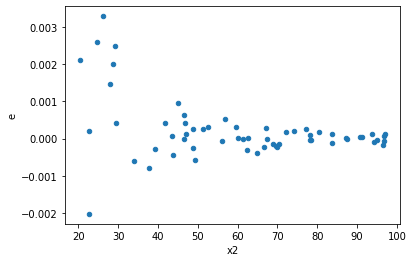

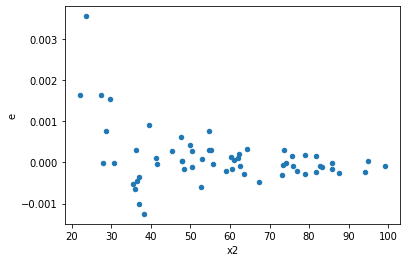

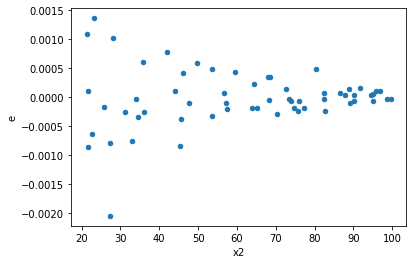

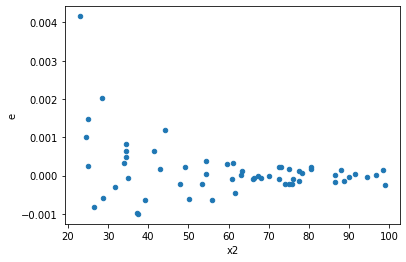

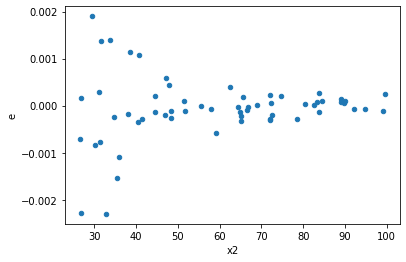

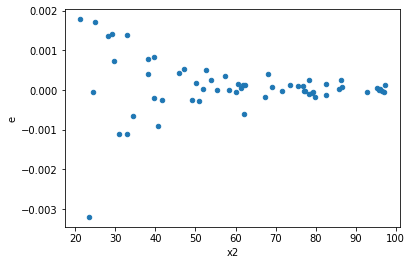

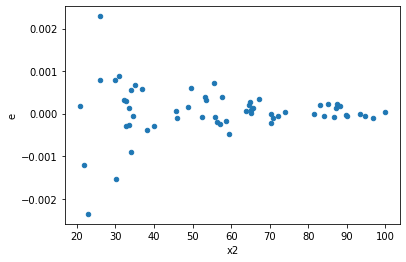

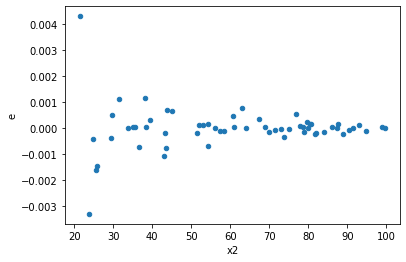

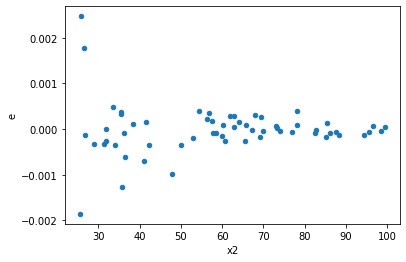

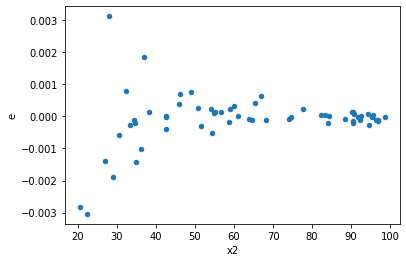

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
13.0,20.0,20.0,1.2508072306739559e-06,5.44605298215126e-06,6.25403615336978e-08,2.72302649107563e-07,4.354030620063521,0.0018124550020481855,0.9990937724989759,0.0009062275010240928,Reject001=0 : Heteroscedasticity
19.0,20.0,20.0,2.1732069301869856e-06,3.192944897199152e-06,1.0866034650934928e-07,1.596472448599576e-07,1.4692318770235224,0.3969636538050305,0.8015181730974847,0.19848182690251526,Reject001=1 : Homoscedasticity
87.0,20.0,20.0,5.195273311889753e-06,9.134684640190316e-06,2.597636655944877e-07,4.5673423200951577e-07,1.7582683512116557,0.21564541864583386,0.8921772906770831,0.10782270932291693,Reject001=1 : Homoscedasticity
93.0,20.0,20.0,5.413923483966292e-06,5.557673538795431e-06,2.706961741983146e-07,2.7788367693977156e-07,1.0265519184478438,0.9538530308719757,0.5230734845640121,0.47692651543598785,Reject001=1 : Homoscedasticity
129.0,20.0,20.0,8.632983767494612e-06,1.2087580166442404e-05,4.316491883747306e-07,6.043790083221202e-07,1.400162503716876,0.4583492007011867,0.7708253996494067,0.22917460035059334,Reject001=1 : Homoscedasticity
132.0,20.0,20.0,7.70239687998672e-06,8.57727311291407e-06,3.85119843999336e-07,4.288636556457035e-07,1.113584932918811,0.8122514152032227,0.5938742923983886,0.4061257076016114,Reject001=1 : Homoscedasticity
153.0,20.0,20.0,7.773920698423248e-06,1.1408845147016005e-05,3.886960349211624e-07,5.704422573508002e-07,1.4675793064534364,0.39833783040646553,0.8008310847967672,0.19916891520323277,Reject001=1 : Homoscedasticity
158.0,20.0,20.0,5.206917882120776e-06,1.5714449920251977e-05,2.603458941060388e-07,7.857224960125988e-07,3.017994574911845,0.01722197596980357,0.9913890120150982,0.008610987984901786,Reject001=1 : Homoscedasticity
169.0,20.0,20.0,9.620255084381304e-06,1.0119459153533056e-05,4.810127542190652e-07,5.059729576766529e-07,1.0518909389380144,0.9110526303818651,0.5444736848090674,0.45552631519093256,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,1.3505359029693335e-05,4.024737380926121e-06,6.752679514846668e-07,2.0123686904630604e-07,0.29801039513849265,0.009353019625417652,Reject001=0 : Heteroscedasticity
1.0,20.0,20.0,1.7781692479021053e-05,2.0902900880878815e-06,8.890846239510526e-07,1.0451450440439408e-07,0.11755293207066865,1.2442125608905424e-05,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,8.708797621252787e-06,1.2765970090796243e-06,4.3543988106263934e-07,6.382985045398121e-08,0.1465870565144654,7.127113263565231e-05,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,1.5178716435771136e-05,3.2342568344177194e-06,7.589358217885568e-07,1.6171284172088596e-07,0.213078414640889,0.001091664584372623,Reject001=0 : Heteroscedasticity
4.0,20.0,20.0,1.724655587244931e-05,2.11818598453477e-06,8.623277936224656e-07,1.0590929922673849e-07,0.12281791217912023,1.7716710848590166e-05,Reject001=0 : Heteroscedasticity
5.0,20.0,20.0,1.3061705221566261e-05,8.942093396873617e-07,6.53085261078313e-07,4.471046698436808e-08,0.06846038281517235,1.2570163549023665e-07,Reject001=0 : Heteroscedasticity
6.0,20.0,20.0,1.4304857999110013e-05,1.3218147156311532e-06,7.152428999555006e-07,6.609073578155766e-08,0.09240320426203398,1.6897316400168633e-06,Reject001=0 : Heteroscedasticity
7.0,20.0,20.0,1.431026523213942e-05,1.2592562247263405e-06,7.15513261606971e-07,6.296281123631703e-08,0.08799670755914274,1.1151263744503696e-06,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,1.469644510888654e-05,1.771598353699154e-06,7.34822255444327e-07,8.85799176849577e-08,0.12054604637878835,1.5245773649990226e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    698
Reject001=1 : Homoscedasticity      302
Name: Result_test, dtype: int64